In [14]:
import pandas as pd

In [21]:
# Taking NFA input from User

nfa = {}
n = int(input("No. of states : "))  # Enter total no. of states
t = int(input("No. of transitions/paths : "))  # Enter total no. of transitions/paths eg: a,b so input 2 for a,b,c input 3
tn = []
for i in range(t):
    element = input(f"Transition/path {i+1} : ")
    tn.append(element)
for i in range(n):
    state = input("state name : ")  # Enter state name eg: A, B, C, q1, q2 ..etc
    nfa[state] = {}  # Creating a nested dictionary
    for j in range(t):
        path = input("path : ")  # Enter path eg : a or b in {a,b} 0 or 1 in {0,1}
        print("Enter end state from state {} travelling through path {} : ".format(state, path))
        reaching_state = [x for x in input().split()]  # Enter all the end states that
        nfa[state][path] = reaching_state  # Assigning the end states to the paths in dictionary

print("\nNFA :- \n")
print(nfa)  # Printing NFA
print("\nPrinting NFA table :- ")
nfa_table = pd.DataFrame(nfa)
nfa_table_update = nfa_table.transpose()
print(nfa_table_update)

print("Enter final state of NFA : ")
nfa_final_state = [x for x in input().split()]  # Enter final state/states of NFA
###################################################

new_states_list = []  # holds all the new states created in dfa
dfa = {}  # dfa dictionary/table or the output structure we needed
keys_list = list(list(nfa.keys())[0])  # conatins all the states in nfa plus the states created in dfa are also appended further
path_list = list(nfa[keys_list[0]].keys())  # list of all the paths eg: [a,b] or [0,1]

###################################################

# Computing first row of DFA transition table

dfa[keys_list[0]] = {}  # creating a nested dictionary in dfa
for y in range(t):
    var = "".join(nfa[keys_list[0]][path_list[y]])  # creating a single string from all the elements of the list which is a new state
    dfa[keys_list[0]][path_list[y]] = var  # assigning the state in DFA table
    if var not in keys_list:  # if the state is newly created
        new_states_list.append(var)  # then append it to the new_states_list
        keys_list.append(var)  # as well as to the keys_list which contains all the states

###################################################

# Computing the other rows of DFA transition table

while len(new_states_list) != 0:  # condition is true only if the new_states_list is not empty
    dfa[new_states_list[0]] = {}  # taking the first element of the new_states_list and examining it
    for _ in range(len(new_states_list[0])):
        for i in range(len(path_list)):
            temp = []  # creating a temporay list
            for j in range(len(new_states_list[0])):
                temp += nfa[new_states_list[0][j]][path_list[i]]  # taking the union of the states
            s = ""
            s = s.join(temp)  # creating a single string(new state) from all the elements of the list
            if s not in keys_list:  # if the state is newly created
                new_states_list.append(s)  # then append it to the new_states_list
                keys_list.append(s)  # as well as to the keys_list which contains all the states
            dfa[new_states_list[0]][path_list[i]] = s  # assigning the new state in the DFA table

    new_states_list.remove(new_states_list[0])  # Removing the first element in the new_states_list

print("\nDFA :- \n")
print(dfa)  # Printing the DFA created
print("\nPrinting DFA table :- ")
dfa_table = pd.DataFrame(dfa)
dfa_table_update = dfa_table.transpose()
print(dfa_table_update)

dfa_states_list = list(dfa.keys())
dfa_final_states = []
for x in dfa_states_list:
    for i in x:
        if i in nfa_final_state:
            dfa_final_states.append(x)
            break

print("\nFinal states of the DFA are : ", dfa_final_states)  # Printing Final states of DFA


No. of states : 4
No. of transitions/paths : 2
Transition/path 1 : a
Transition/path 2 : b
state name : A
path : a
Enter end state from state A travelling through path a : 
A B
path : b
Enter end state from state A travelling through path b : 
A
state name : B
path : a
Enter end state from state B travelling through path a : 
C
path : b
Enter end state from state B travelling through path b : 
C
state name : C
path : a
Enter end state from state C travelling through path a : 
D
path : b
Enter end state from state C travelling through path b : 
D
state name : D
path : a
Enter end state from state D travelling through path a : 

path : b
Enter end state from state D travelling through path b : 


NFA :- 

{'A': {'a': ['A', 'B'], 'b': ['A']}, 'B': {'a': ['C'], 'b': ['C']}, 'C': {'a': ['D'], 'b': ['D']}, 'D': {'a': [], 'b': []}}

Printing NFA table :- 
        a    b
A  [A, B]  [A]
B     [C]  [C]
C     [D]  [D]
D      []   []
Enter final state of NFA : 
D

DFA :- 

{'A': {'a': 'AB', 'b': '

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
%matplotlib notebook
sns.set()

<IPython.core.display.Javascript object>


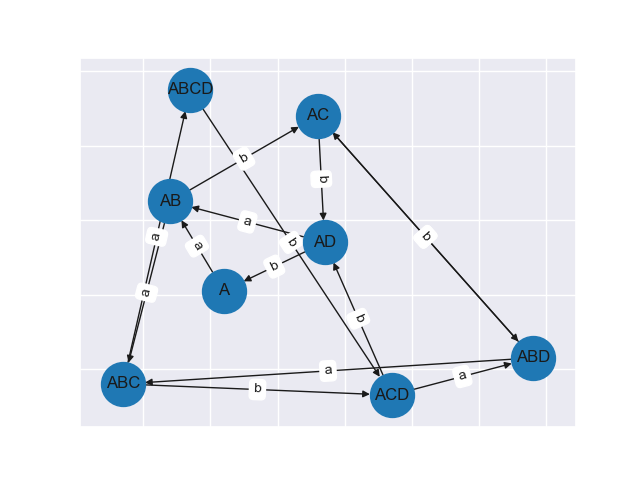

{('A', 'AB'): Text(38.0, 53.0, 'a'),
 ('A', 'A'): Text(42.0, 41.0, 'b'),
 ('AB', 'ABC'): Text(30.5, 40.5, 'a'),
 ('AB', 'AC'): Text(45.0, 76.5, 'b'),
 ('ABC', 'ABCD'): Text(32.0, 55.5, 'a'),
 ('ABC', 'ACD'): Text(47.0, 14.5, 'b'),
 ('AC', 'ABD'): Text(72.0, 55.5, 'a'),
 ('AC', 'AD'): Text(56.5, 71.0, 'b'),
 ('ABCD', 'ABCD'): Text(37.0, 95.0, 'a'),
 ('ABCD', 'ACD'): Text(52.0, 54.0, 'b'),
 ('ACD', 'ABD'): Text(77.5, 18.0, 'a'),
 ('ACD', 'AD'): Text(62.0, 33.5, 'b'),
 ('ABD', 'ABC'): Text(57.5, 19.5, 'a'),
 ('ABD', 'AC'): Text(72.0, 55.5, 'b'),
 ('AD', 'AB'): Text(45.5, 59.5, 'a'),
 ('AD', 'A'): Text(49.5, 47.5, 'b')}

In [38]:
plt.figure()

col_one_list = dfa_table_update['a'].to_numpy()
col_one_arr = dfa_table_update['b'].to_numpy()

A = nx.DiGraph()

i = 0
for x in dfa.keys():
    A.add_node(x, pos = (randint(1,100),randint(2,99)))
    A.add_edge(x,col_one_list[i], weight=tn[0])
    A.add_edge(x,col_one_arr[i], weight=tn[1])
    i +=1
weight = nx.get_edge_attributes(A,'weight')
pos = nx.get_node_attributes(A,'pos')
nx.draw_networkx(A,pos, node_size=1000) 
nx.draw_networkx_edge_labels(A,pos,edge_labels=weight)

In [36]:
print(tn)

['a', 'b']


In [44]:
for x in dfa.keys():
    A.add_node(x, pos = (randint(1,100),randint(2,99)))
    A.add_edge(x,col_one_list[i], weight=tn[0])
    if(x == col_one_list[i]):
        A.add_node(col_one_list[i], pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,col_one_list[i], weight=tn[1])
    A.add_edge(x,col_one_arr[i], weight=tn[1])
    if(x == col_one_arr[i]):
        A.add_node(col_one_arr[i], pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,col_one_arr[i], weight=tn[1])
    i +=1
weight = nx.get_edge_attributes(A,'weight')
pos = nx.get_node_attributes(A,'pos')
nx.draw_networkx(A,pos, node_size=1000) 
nx.draw_networkx_edge_labels(A,pos,edge_labels=weight)

IndexError: index 8 is out of bounds for axis 0 with size 8

<IPython.core.display.Javascript object>


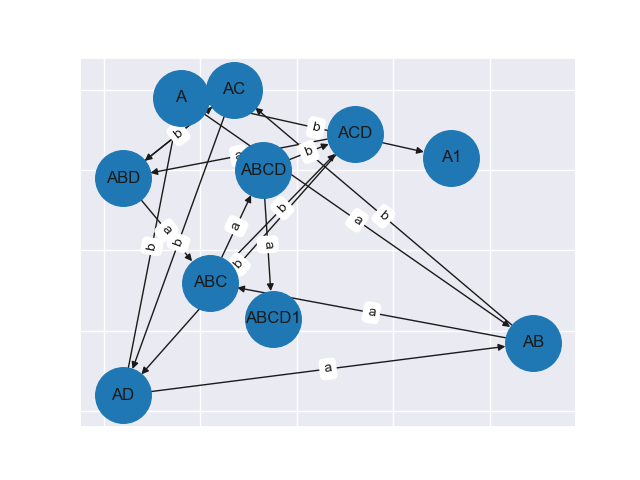

{('A', 'AB'): Text(52.5, 47.5, 'a'),
 ('A', 'A'): Text(16.0, 78.0, 'b'),
 ('A', 'A1'): Text(44.0, 70.5, 'b'),
 ('AB', 'ABC'): Text(55.5, 24.5, 'a'),
 ('AB', 'AC'): Text(58.0, 48.5, 'b'),
 ('ABC', 'ABCD'): Text(27.5, 46.0, 'a'),
 ('ABC', 'ACD'): Text(37.0, 50.5, 'b'),
 ('AC', 'ABD'): Text(15.5, 69.0, 'a'),
 ('AC', 'AD'): Text(15.5, 42.0, 'b'),
 ('ABCD', 'ABCD'): Text(33.0, 60.0, 'a'),
 ('ABCD', 'ABCD1'): Text(34.0, 41.5, 'a'),
 ('ABCD', 'ACD'): Text(42.5, 64.5, 'b'),
 ('ACD', 'ABD'): Text(28.0, 63.5, 'a'),
 ('ACD', 'AD'): Text(28.0, 36.5, 'b'),
 ('ABD', 'ABC'): Text(13.0, 45.0, 'a'),
 ('ABD', 'AC'): Text(15.5, 69.0, 'b'),
 ('AD', 'AB'): Text(46.5, 10.5, 'a'),
 ('AD', 'A'): Text(10.0, 41.0, 'b')}

In [146]:
plt.figure()

col_one_list = dfa_table_update['a'].to_numpy()
col_one_arr = dfa_table_update['b'].to_numpy()

A = nx.DiGraph()

i = 0
for x in dfa.keys():
    A.add_node(x, pos = (randint(1,100),randint(2,99)))
#     A.add_node(x,pos = (randint(1,100),randint(2,99)))
    A.add_edge(x,col_one_list[i], weight=tn[0])
    if(x == col_one_list[i]):
        A.add_node(f'{col_one_list[i]}1', pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,f'{col_one_list[i]}1', weight=tn[0])
    A.add_edge(x,col_one_arr[i], weight=tn[1])
    if(x == col_one_arr[i]):
        A.add_node(f'{col_one_arr[i]}1', pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,f'{col_one_arr[i]}1', weight=tn[1])
    i +=1
weight = nx.get_edge_attributes(A,'weight')
pos = nx.get_node_attributes(A,'pos')
nx.draw_networkx(A,pos,node_size=1600) 
nx.draw_networkx_edge_labels(A,pos,edge_labels=weight)

In [143]:
import numpy
# plt.figure()
F = nx.DiGraph()
F.add_node(0)
F.add_node(1)
F.add_edge(0,1)
# nx.draw_networkx(F)
# name = 17
# if F.node()=='0':
#     print('yes')
# a = nx.get_node_attributes(F,name)
# print(a.items)
a  = numpy.array(F.nodes)
print(a)
print(type(a))

[0 1]
<class 'numpy.ndarray'>


In [93]:
nx.draw_network(G,?)

SyntaxError: invalid syntax (<ipython-input-93-997e5355a197>, line 1)

<IPython.core.display.Javascript object>


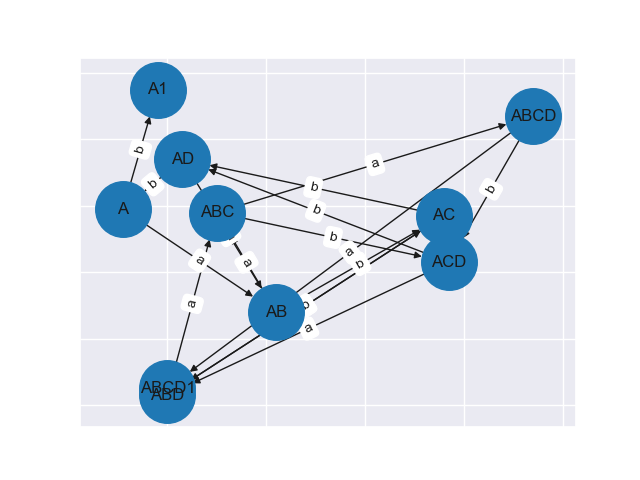

blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
red
blue
blue
blue
blue
red
blue
blue
blue
blue
red
blue
blue
blue
blue
red


In [129]:
plt.figure()

col_one_list = dfa_table_update['a'].to_numpy()
col_one_arr = dfa_table_update['b'].to_numpy()

A = nx.DiGraph()
color_map = []

i = 0
for x in dfa.keys():
    for y in dfa_final_states:
        if x == y:
            A.add_node(x, pos = (randint(1,100),randint(2,99)))
            color_map.append('red')
        elif x != y :
            A.add_node(x, pos = (randint(1,100),randint(2,99)))
            color_map.append('blue')
    A.add_edge(x,col_one_list[i], weight=tn[0])
    if(x == col_one_list[i]):
        A.add_node(f'{col_one_list[i]}1', pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,f'{col_one_list[i]}1', weight=tn[0])
    A.add_edge(x,col_one_arr[i], weight=tn[1])
    if(x == col_one_arr[i]):
        A.add_node(f'{col_one_arr[i]}1', pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,f'{col_one_arr[i]}1', weight=tn[1])
    i +=1
weight = nx.get_edge_attributes(A,'weight')
pos = nx.get_node_attributes(A,'pos')
nx.draw_networkx(A,pos,node_size=1600)
# nx.draw_networkx(A, node_color=color_map)
nx.draw_networkx_edge_labels(A,pos,edge_labels=weight)
for x in color_map:
    print(x)

<IPython.core.display.Javascript object>


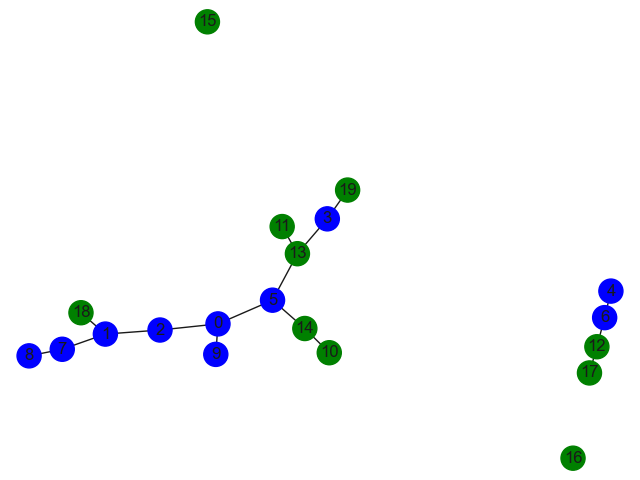

In [111]:
plt.figure()
G = nx.erdos_renyi_graph(20, 0.1)
color_map = []
for node in G:
    if node < 10:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

<IPython.core.display.Javascript object>


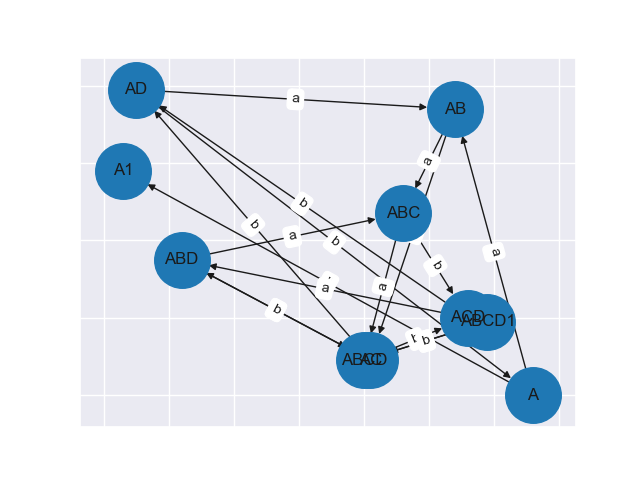

{('A', 'AB'): Text(60.0, 57.0, 'a'),
 ('A', 'A'): Text(66.0, 20.0, 'b'),
 ('A', 'A1'): Text(34.5, 49.0, 'b'),
 ('AB', 'ABC'): Text(50.0, 80.5, 'a'),
 ('AB', 'AC'): Text(47.5, 61.5, 'b'),
 ('ABC', 'ABCD'): Text(43.0, 48.0, 'a'),
 ('ABC', 'ACD'): Text(51.0, 53.5, 'b'),
 ('AC', 'ABD'): Text(26.5, 42.0, 'a'),
 ('AC', 'AD'): Text(23.0, 64.0, 'b'),
 ('ABCD', 'ABCD'): Text(40.0, 29.0, 'a'),
 ('ABCD', 'ABCD1'): Text(49.5, 34.0, 'a'),
 ('ABCD', 'ACD'): Text(48.0, 34.5, 'b'),
 ('ACD', 'ABD'): Text(34.0, 47.5, 'a'),
 ('ACD', 'AD'): Text(30.5, 69.5, 'b'),
 ('ABD', 'ABC'): Text(29.0, 61.0, 'a'),
 ('ABD', 'AC'): Text(26.5, 42.0, 'b'),
 ('AD', 'AB'): Text(29.5, 96.5, 'a'),
 ('AD', 'A'): Text(35.5, 59.5, 'b'),
 ('ABCD1', 'ABCD'): Text(49.5, 34.0, 'b')}

In [147]:
plt.figure()

col_one_list = dfa_table_update['a'].to_numpy()
col_one_arr = dfa_table_update['b'].to_numpy()

A = nx.DiGraph()

i = 0
for x in dfa.keys():
    A.add_node(x, pos = (randint(1,100),randint(2,99)))
#     A.add_node(x,pos = (randint(1,100),randint(2,99)))
    A.add_edge(x,col_one_list[i], weight=tn[0])
    if(x == col_one_list[i]):
        A.add_node(f'{col_one_list[i]}1', pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,f'{col_one_list[i]}1', weight=tn[0])
        A.add_edge(f'{col_one_list[i]}1',col_one_list[i], weight=tn[1])
    A.add_edge(x,col_one_arr[i], weight=tn[1])
#     A.add_edge(f'{col_one_arr[i]}1',col_one_arr[i], weight=tn[1])
    if(x == col_one_arr[i]):
        A.add_node(f'{col_one_arr[i]}1', pos = (randint(1,100),randint(2,99)))
        A.add_edge(x,f'{col_one_arr[i]}1', weight=tn[1])
#         A.add_edge(f'{col_one_arr[i]}1',col_one_arr[i], weight=tn[1])
    i +=1
weight = nx.get_edge_attributes(A,'weight')
pos = nx.get_node_attributes(A,'pos')
nx.draw_networkx(A,pos,node_size=1600) 
nx.draw_networkx_edge_labels(A,pos,edge_labels=weight)